<a href="https://colab.research.google.com/github/apurva-shrivastava/Cardiovascular-Risk-Prediction/blob/main/Apurva_Shrivastava_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - *Cardiovascular Risk Prediction*



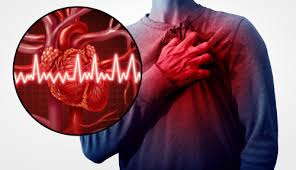

##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

Heart disease refers to various types of conditions that can affect heart function. 

These types include: coronary artery (atherosclerotic) disease that affects the blood supply to the heart, valvular heart disease that affects how the valves function to regulate blood flow, cardiomyopathies that affect heart muscles, heart rhythm disturbances (arrhythmias) that affect the electrical conduction and congenital heart diseases where the heart has structural defects that develop before birth.

Heart disease is the major cause of morbidity and mortality globally: it accounts for more deaths annually than any other cause. For example an estimated 17.9 million people died from heart diseases in 2016, representing 31% of all global deaths. 
Over three quarters of these deaths took place in low- and middle-income countries.

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.The dataset provides the patients’ information. It includes  3390 records and 17 attributes. Variables Each attribute is a potential risk factor. There are both **demographic**, **behavioral**, and **medical** risk factors.





# **GitHub Link -**

https://github.com/apurva-shrivastava/Cardiovascular-Risk-Prediction

# **Problem Statement**


**The Problem statment is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt#For visualizations
import itertools
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, MinMaxScaler#for Scalling feature datas
from sklearn.impute import KNNImputer, SimpleImputer#for outlier handling
# Importing libraries for modelling and evaluation
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split#For train and test dataset splitting
from sklearn.feature_selection import mutual_info_classif#For information gain analysis
from imblearn.over_sampling import SMOTE#for oversampling in case of class imbalance
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency


### Dataset Loading

In [2]:
#mouting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
data=pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')


### Dataset First View

In [4]:
# Dataset First Look
#first five records
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#last 5 records
data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset has 3390 rows and 17 columns.


### Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f"Their are {sum(data.duplicated())} duplicated values in dataset.")

Their are 0 duplicated values in dataset.


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
for column in data.columns.to_list():
  print(f"There are {sum(data[column].isna())} null values in column {column}.")


There are 0 null values in column id.
There are 0 null values in column age.
There are 87 null values in column education.
There are 0 null values in column sex.
There are 0 null values in column is_smoking.
There are 22 null values in column cigsPerDay.
There are 44 null values in column BPMeds.
There are 0 null values in column prevalentStroke.
There are 0 null values in column prevalentHyp.
There are 0 null values in column diabetes.
There are 38 null values in column totChol.
There are 0 null values in column sysBP.
There are 0 null values in column diaBP.
There are 14 null values in column BMI.
There are 1 null values in column heartRate.
There are 304 null values in column glucose.
There are 0 null values in column TenYearCHD.


<Axes: >

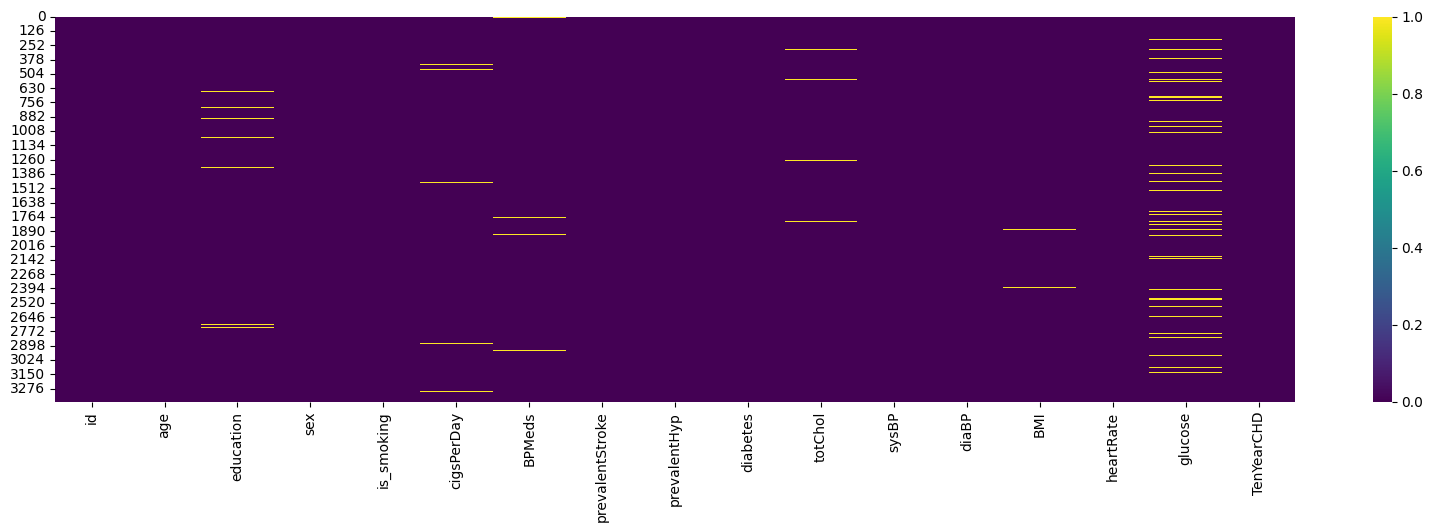

In [10]:
# Visualizing the missing values
fig = plt.figure(figsize=(20,5))
sns.heatmap(data.isna(),cmap="viridis")


### What did you know about your dataset?

* The dataset has 3390 rows and 17 columns.

* The dataset contains 7 categorical features namely 'education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp' & 'diabetes'.

* The dataset contains 8 numerical features namely 'age', 'totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate' & 'glucose'.

* Here the target feature is 'TenYearCHD'.

* There are 87 null values in column education.
* There are 22 null values in column cigsPerDay.
* There are 44 null values in column BPMeds.
* There are 38 null values in column totChol.
* There are 14 null values in column BMI.
* There are 1 null values in column heartRate.
* There are 304 null values in column glucose.
* Their are 0 duplicated values in dataset.




## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
data.columns.to_list()

['id',
 'age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [12]:
# Dataset Describe
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


### Variables Description 

**Demographic:**

* **Sex:** male or female("M" or "F")

* **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

* **Education:-** Education level (discrete)[1,2,3,4]

**Behavioral:**

* **is_smoking:** whether or not the patient is a current smoker ("YES" or "NO")

* **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history):**

* **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)

* **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)

* **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)

* **Diabetes:** whether or not the patient had diabetes (Nominal)

**Medical(current):**

* **Tot Chol:** total cholesterol level (Continuous)

* **Sys BP:** systolic blood pressure (Continuous)

* **Dia BP:** diastolic blood pressure (Continuous)

* **BMI:** Body Mass Index (Continuous)

* **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though infact discrete, yet are considered continuous because of large number of possible values.)

* **Glucose:** glucose level (Continuous)

**Predictive variable(desired target):**

* **10-year risk of coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”) (DV)

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
data.nunique().sort_values()

prevalentHyp          2
diabetes              2
prevalentStroke       2
BPMeds                2
TenYearCHD            2
sex                   2
is_smoking            2
education             4
cigsPerDay           32
age                  39
heartRate            68
glucose             132
diaBP               142
sysBP               226
totChol             240
BMI                1259
id                 3390
dtype: int64

In [14]:
#printing unique values for feasible columns 
col_of_intrest=['prevalentHyp','diabetes','prevalentStroke','BPMeds','TenYearCHD','sex','is_smoking','education']
for col in col_of_intrest:
  print(f"The unique values for the column {col} are {data[col].unique()}.")

The unique values for the column prevalentHyp are [0 1].
The unique values for the column diabetes are [0 1].
The unique values for the column prevalentStroke are [0 1].
The unique values for the column BPMeds are [ 0. nan  1.].
The unique values for the column TenYearCHD are [1 0].
The unique values for the column sex are ['F' 'M'].
The unique values for the column is_smoking are ['YES' 'NO'].
The unique values for the column education are [ 2.  4.  1.  3. nan].


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

#Setting column 'id' as index.
data.set_index('id',inplace=True)

In [16]:
#Since we have a lot of missing values in our data set , we'll first perform missing value imputation.

#Segregating columns into categorical and numerical having null values.
cat=['education','BPMeds']
num=['glucose','totChol','cigsPerDay','BMI','heartRate']


In [17]:
#Using Simple imputer for categorical values.

#initialising object
simp_imputer = SimpleImputer(strategy="most_frequent")
#fitting required data
simp_imputer.fit(data[cat])
#tranformed and and added back data
data[cat]= simp_imputer.transform(data[cat])

In [18]:
#Using Knn imputer for categorical values.

#initialising object
knn_imputer= KNNImputer(n_neighbors=5)
#fitting required data
knn_imputer.fit(data[num])
#tranformed and and added back data
data[num]= knn_imputer.transform(data[num])

In [19]:
#Checking missing values and finding it to be sorted.
data.isna().sum().sort_values(ascending=False)

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [20]:
#creating copy of dataset and coverting binary numeric values(0,1)
#into actual strings for easy data visualization and plots.

data_visual=data.copy()

In [21]:
data_visual['education'].replace({1:'level-1',2:'level-2',3:'level-3',4:'level-4'},inplace=True)
data_visual['TenYearCHD'].replace({0:'No Risk of CHD',1:'Risk of CHD'},inplace=True)
data_visual['prevalentHyp'].replace({0:'No hypertension before',1:'had hypertension'},inplace=True)
data_visual['prevalentStroke'].replace({0:'No History of Stroke',1:'Had Stroke'},inplace=True)
data_visual['BPMeds'].replace({0:'Not Taking BP Medicine',1:'Taking BP Medicine'},inplace=True)
data_visual['diabetes'].replace({0:'Not Having diabetes',1:'Having diabetes'},inplace=True)
data_visual['sex'].replace({'F':'Females','M':'Males'},inplace=True)

In [22]:
#label Encoding categorical features for further better analysis
data['sex']=np.where(data['sex']=='M',1,0)
data['is_smoking']=np.where(data['is_smoking']=='YES',1,0)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

##**Analysing relationship between each categorical feature with respect to each other and gathering useful insights !**

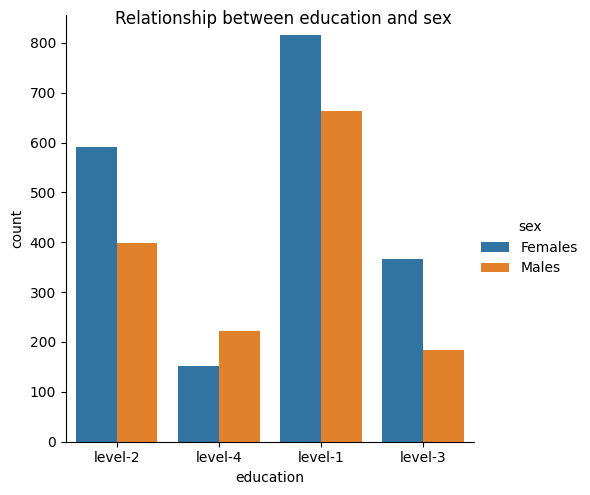

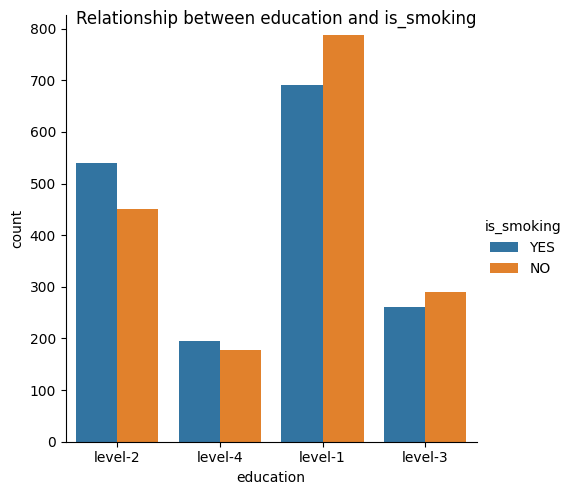

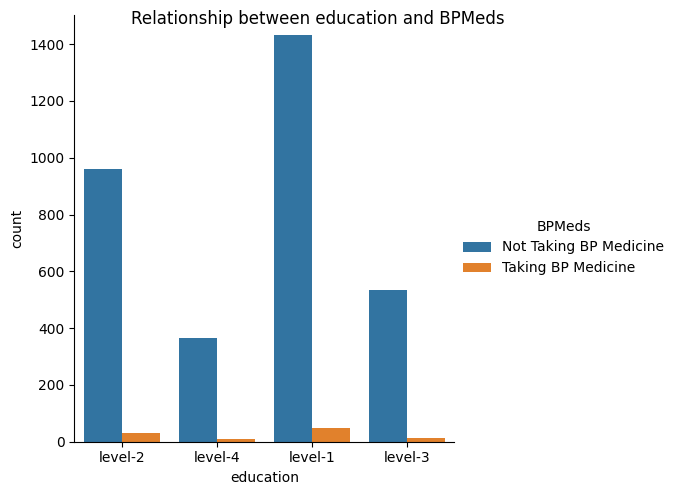

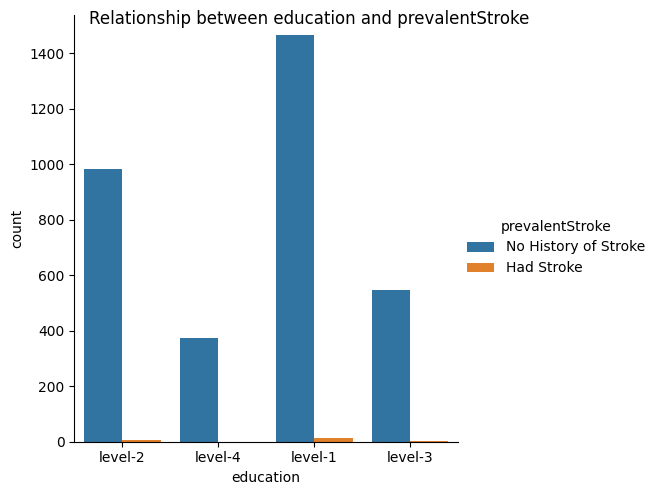

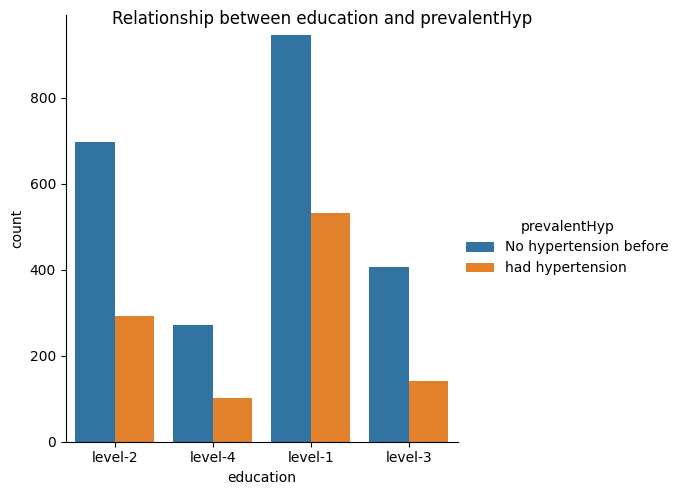

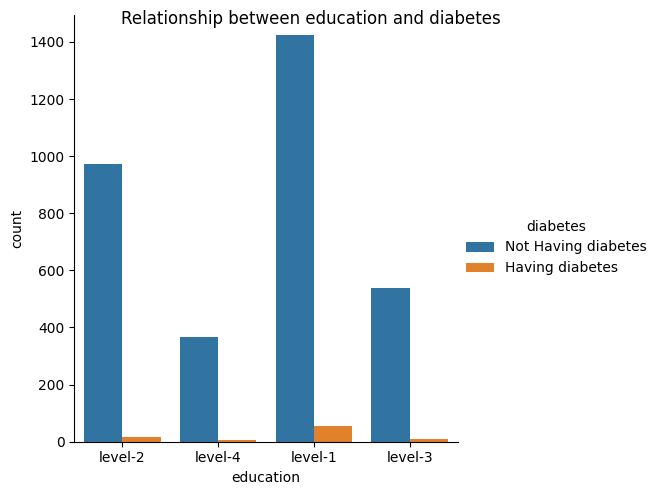

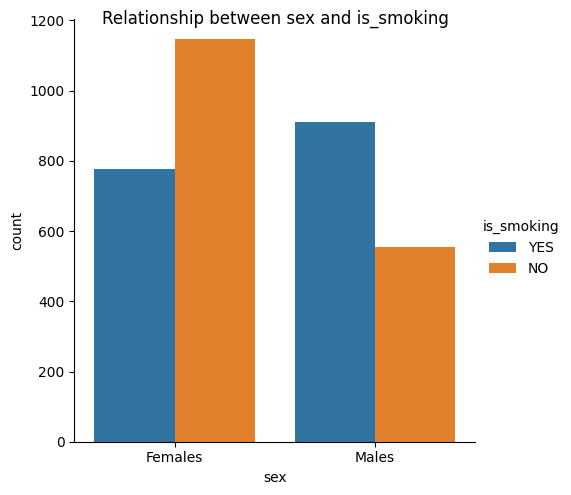

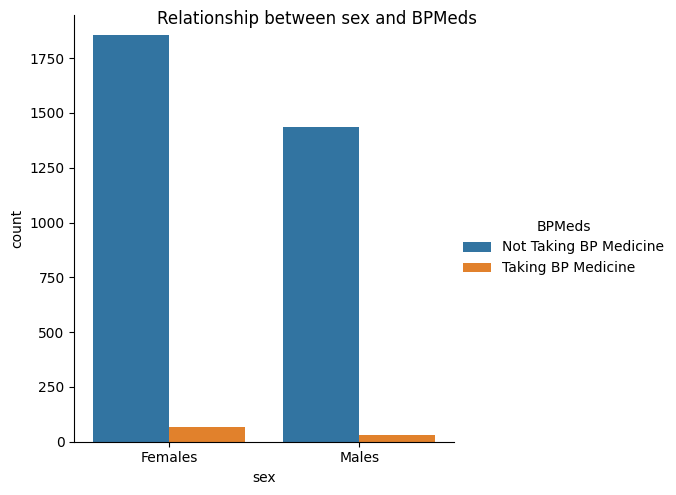

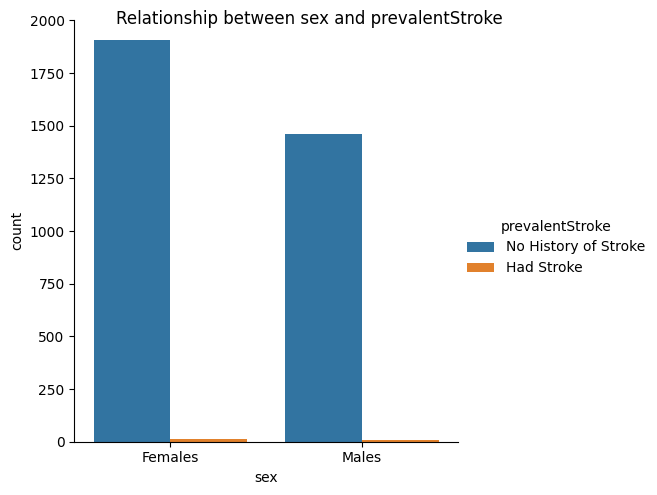

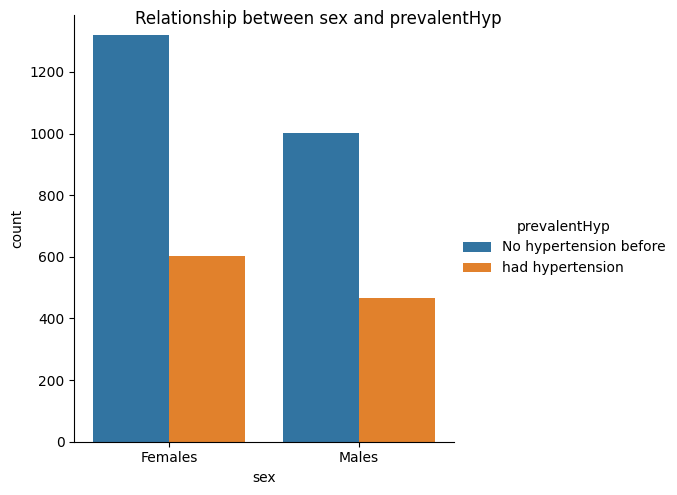

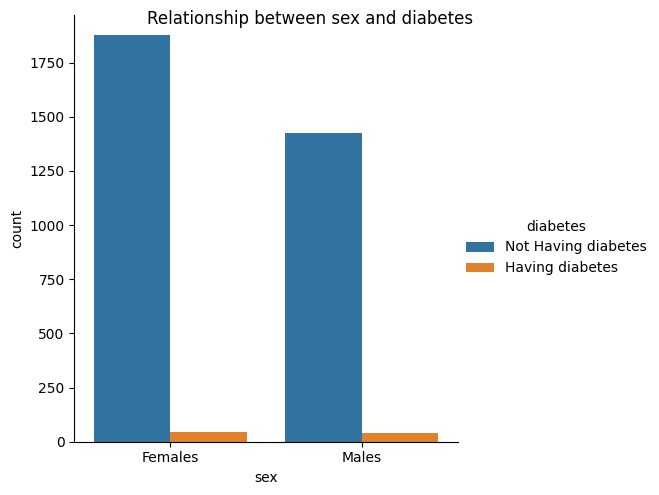

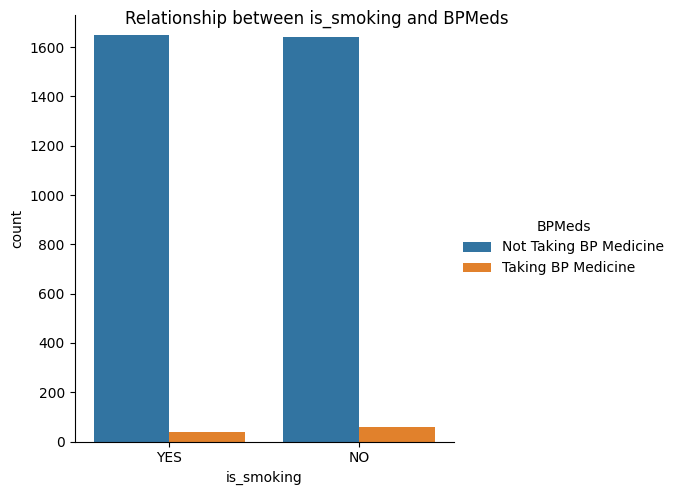

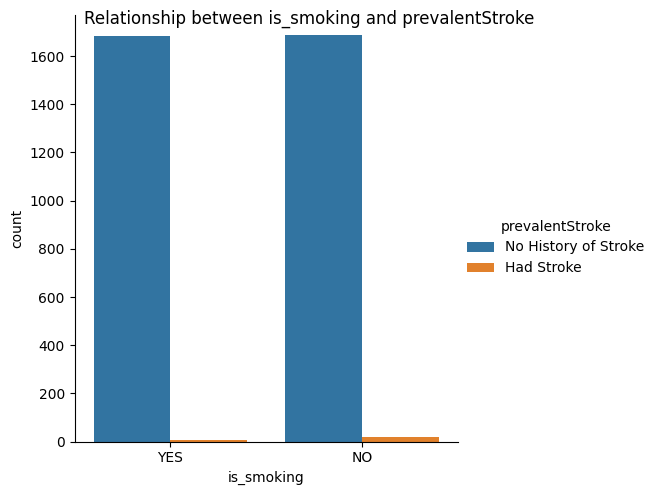

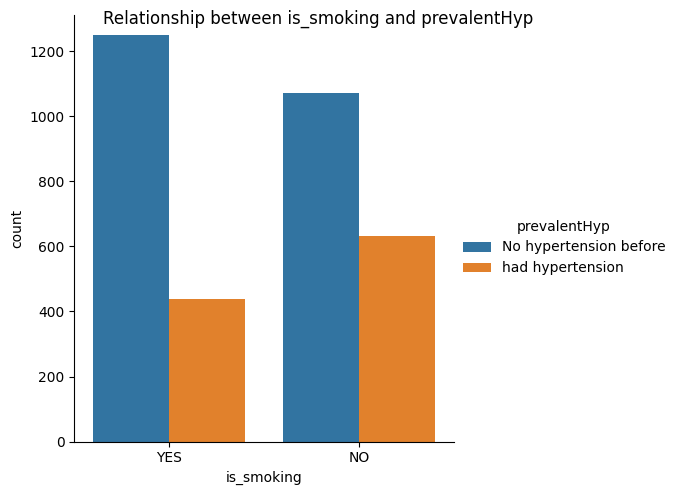

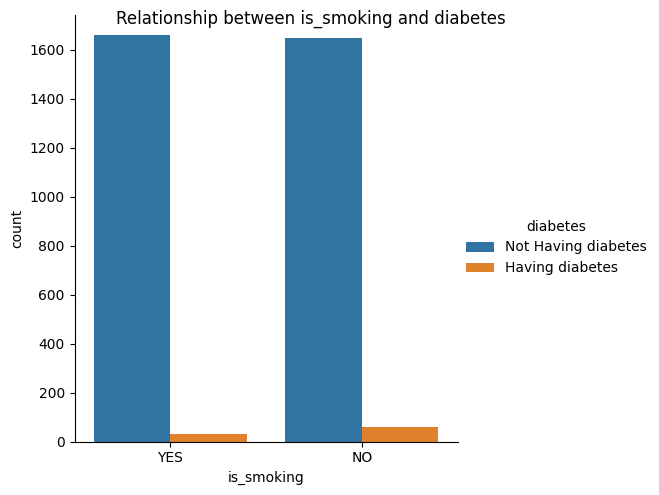

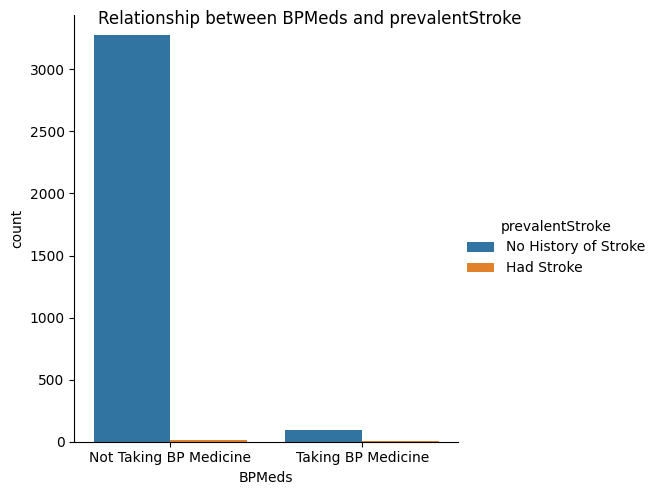

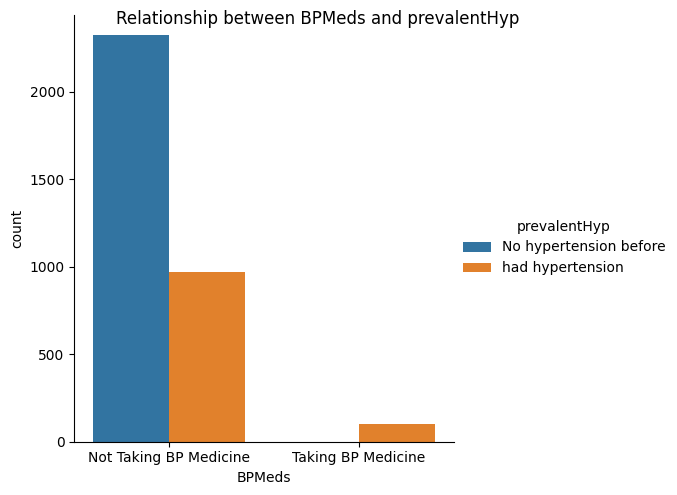

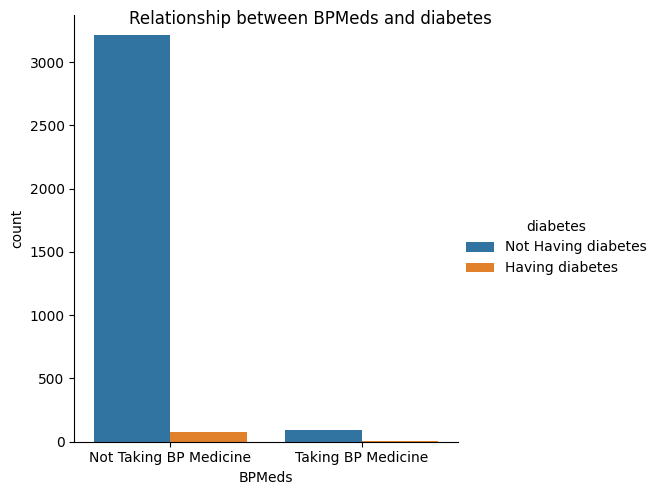

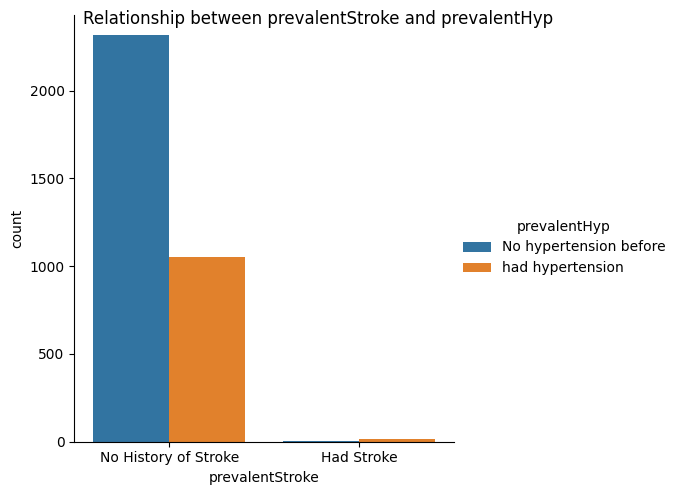

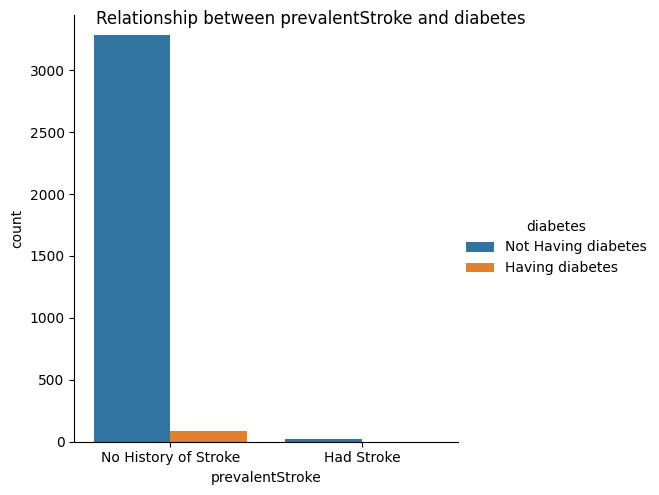

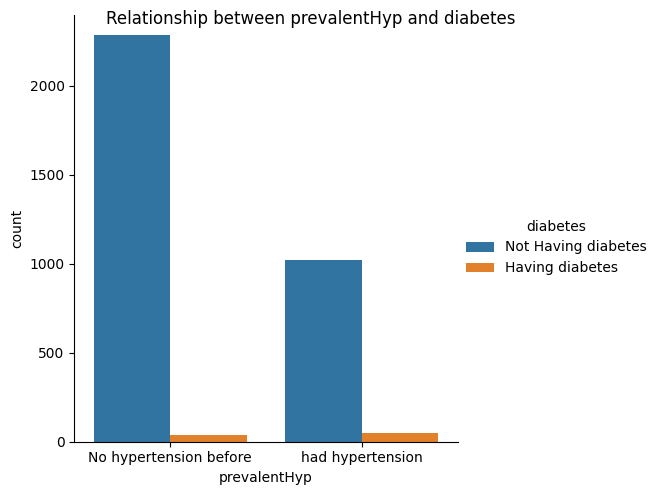

In [23]:
# Chart - 1 visualization code

# create an empty set to keep track of the pairs of variables that have already been plotted
plotted_pairs_cat = set()

# loop through each categorical variable in the DataFrame
for col1 in data_visual.select_dtypes(include=['object']):
    # loop through each other categorical variable in the DataFrame
    for col2 in data_visual.select_dtypes(include=['object']):
        # check if the pair of variables has already been plotted
        if (col1, col2) not in plotted_pairs_cat and (col2, col1) not in plotted_pairs_cat and col1!=col2 and col1!='TenYearCHD' and col2!='TenYearCHD':
            # if the pair of variables has not been plotted, create a count plot of the two variables
            plot = sns.catplot(x=col1, hue=col2, kind="count", data=data_visual)
            plot.fig.suptitle(f"Relationship between {col1} and {col2}")
            # add the pair of variables to the set of plotted pairs
            plotted_pairs_cat.add((col1, col2))
            
            


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

##**Analysing relationship between each numerical feature with respect to each other and checking their behaviour !**

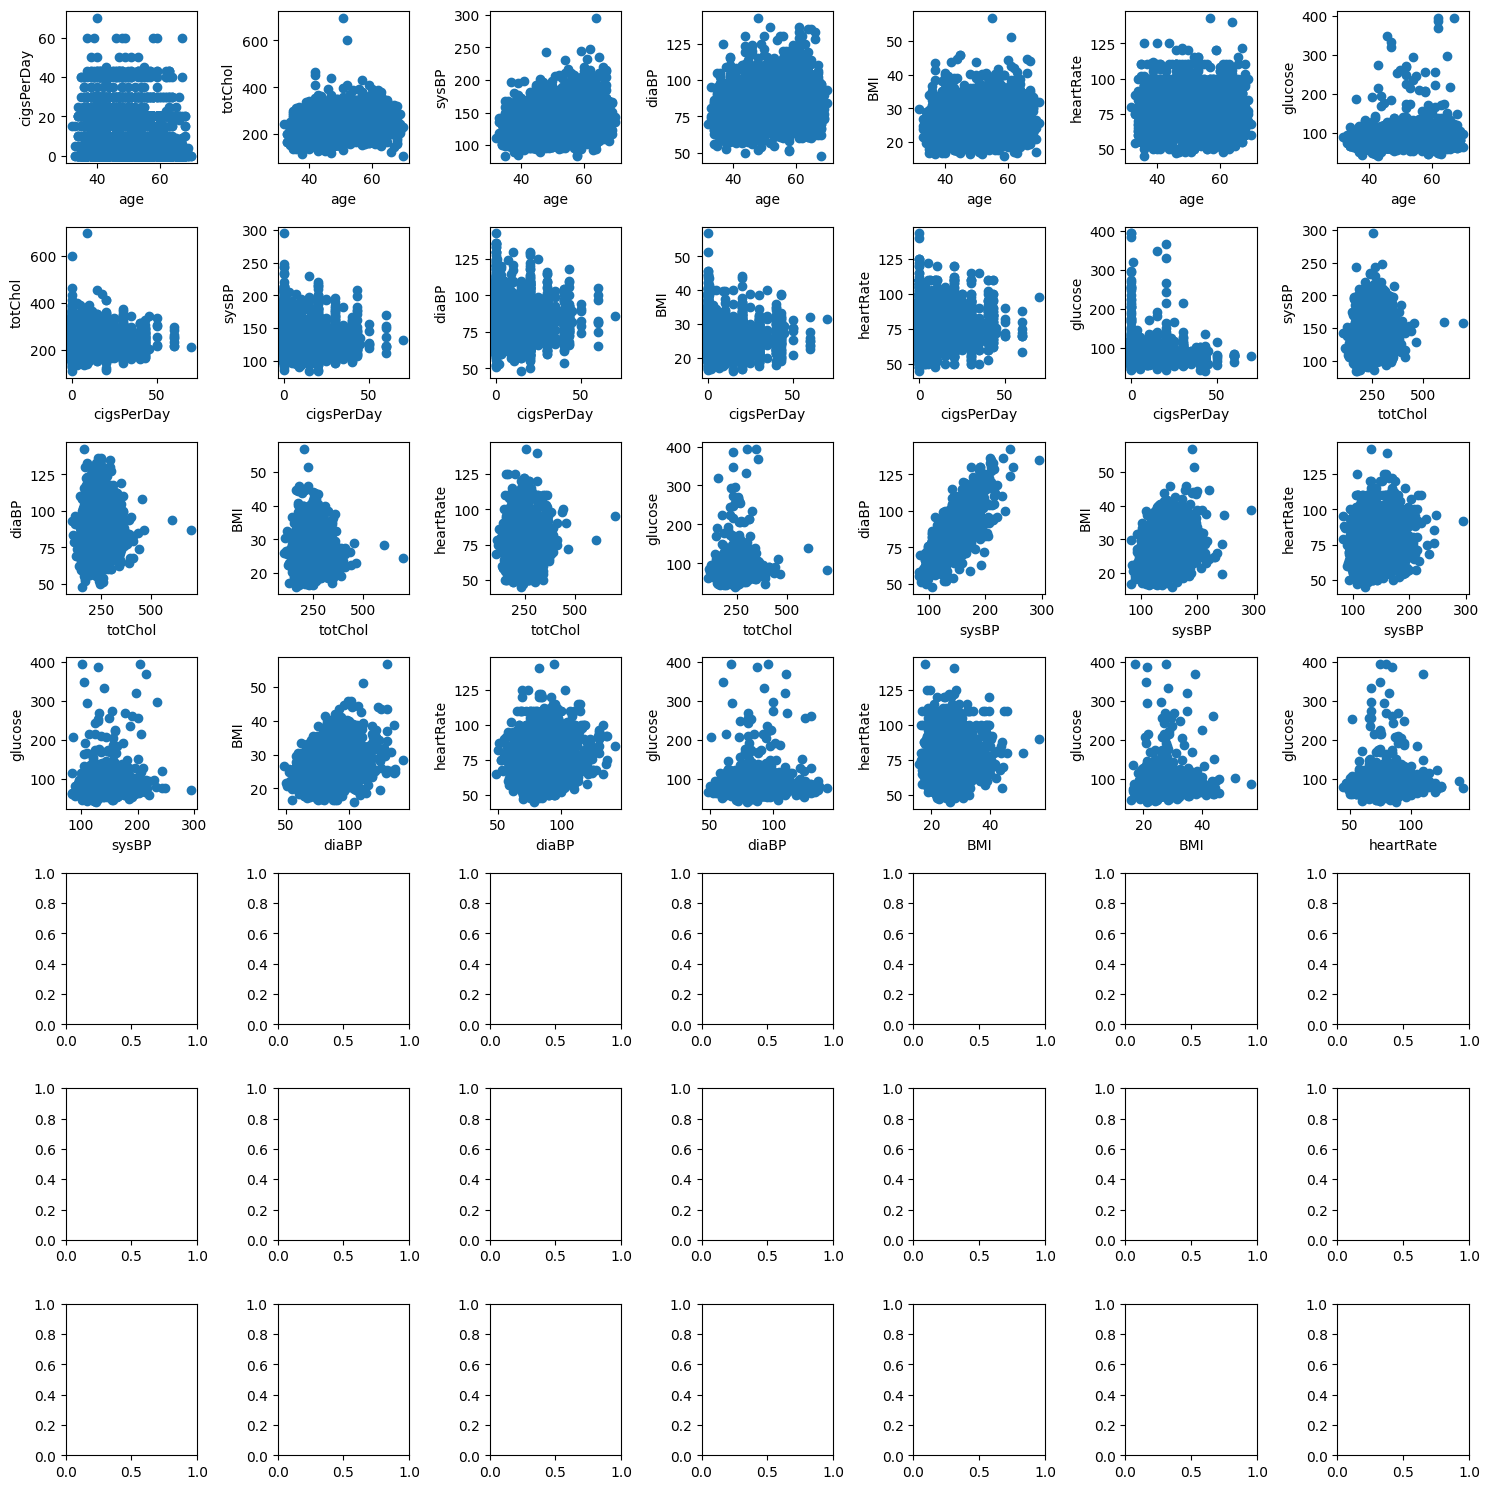

In [24]:
# Chart - 2 visualization code

#columns of intrest 
num_cols = data_visual.select_dtypes(include=['float64', 'int64'])

# Create unique scatter plots between all numerical features
fig, axs = plt.subplots(nrows=num_cols.shape[1]-1, ncols=num_cols.shape[1]-1, figsize=(15,15))
for i, (x, y) in enumerate(itertools.combinations(num_cols.columns, 2)):
    r, c = i // (num_cols.shape[1] - 1), i % (num_cols.shape[1] - 1)
    axs[r, c].scatter(num_cols[x], num_cols[y])
    axs[r, c].set_xlabel(x)
    axs[r, c].set_ylabel(y)
plt.tight_layout()

# Display the plot
plt.show()   

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

##**Analysing relationship between each categorical feature with respect to target variable and plotting insights !**

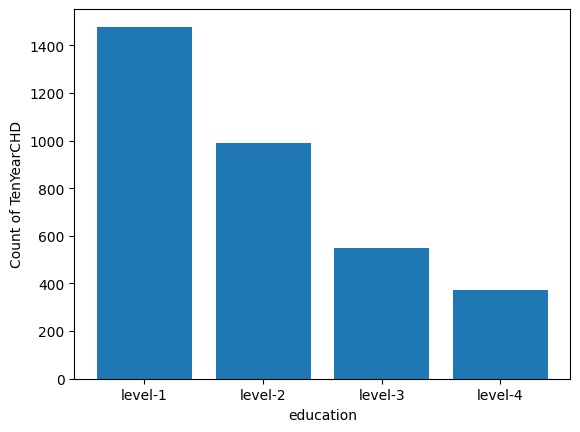

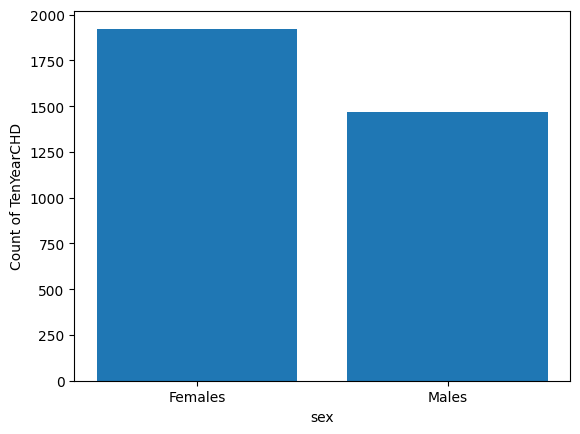

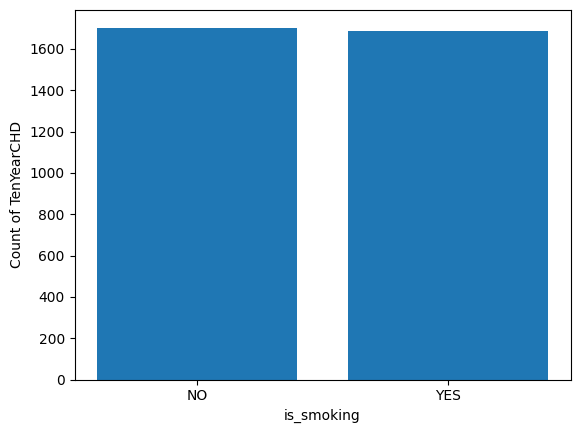

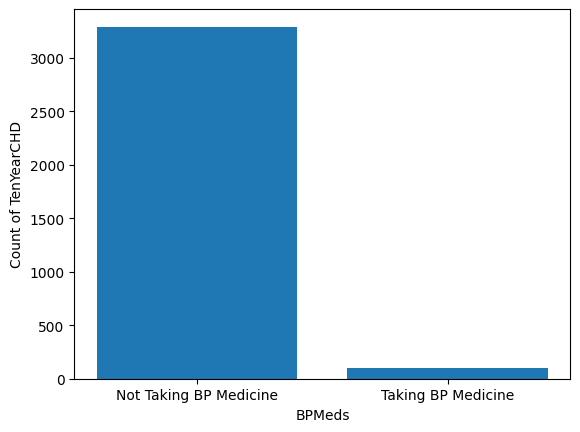

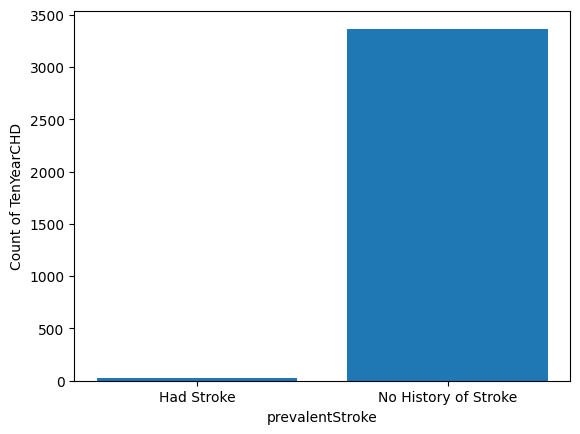

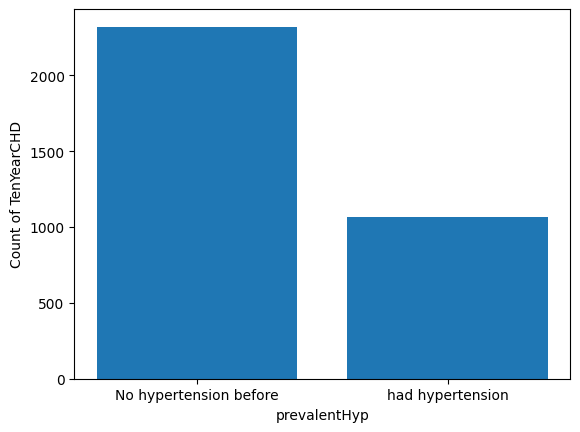

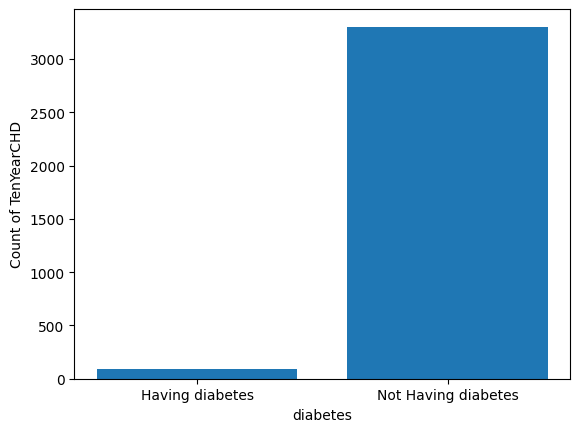

In [25]:
# Chart - 3 visualization code
cat_vars = ["education", "sex", "is_smoking",'BPMeds','prevalentStroke','prevalentHyp','diabetes']
target_var = 'TenYearCHD'

# Create a bar plot for each categorical variable
for cat_var in cat_vars:
    # Group the data by the categorical variable and count the target variable occurrences
    grouped = data_visual[[cat_var, target_var]].groupby(cat_var).count().reset_index()

    # Create a bar plot of the target variable occurrences by the categorical variable
    fig, ax = plt.subplots()
    ax.bar(grouped[cat_var], grouped[target_var])
    ax.set_xlabel(cat_var)
    ax.set_ylabel("Count of " + target_var)
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

##**Analysing relationship between each numerical feature with respect to target variable and plotting insights!**

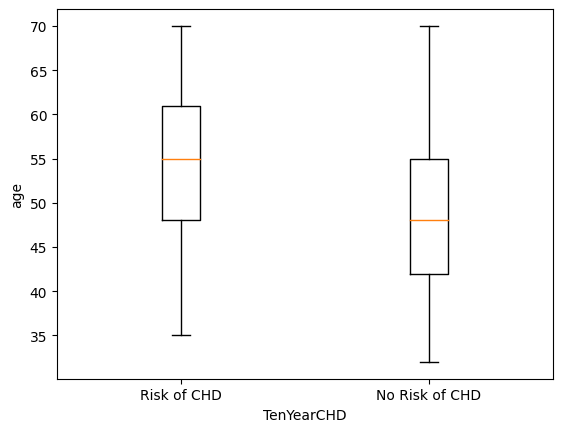

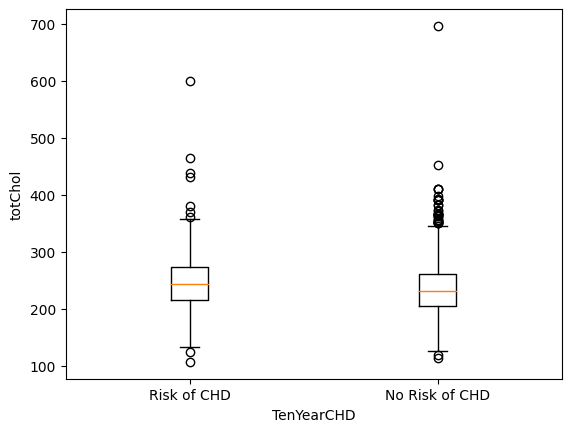

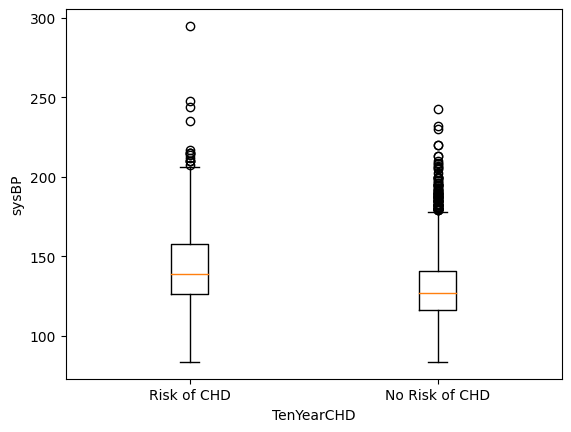

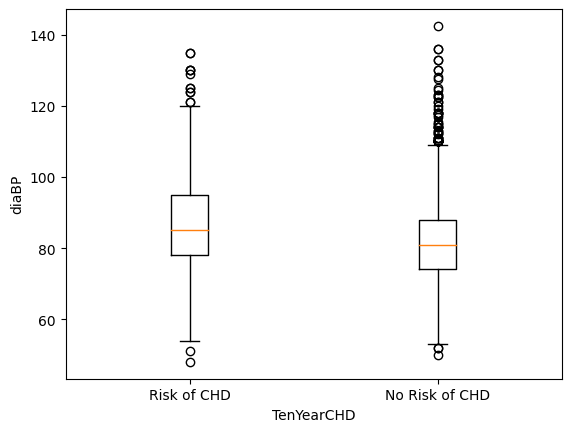

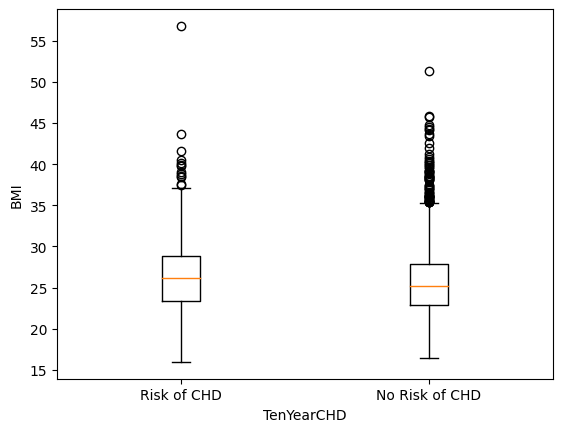

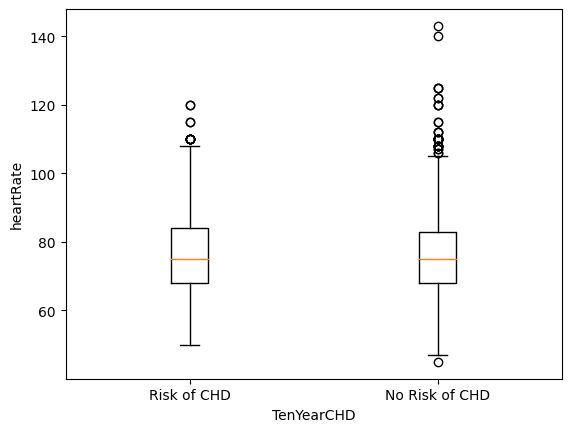

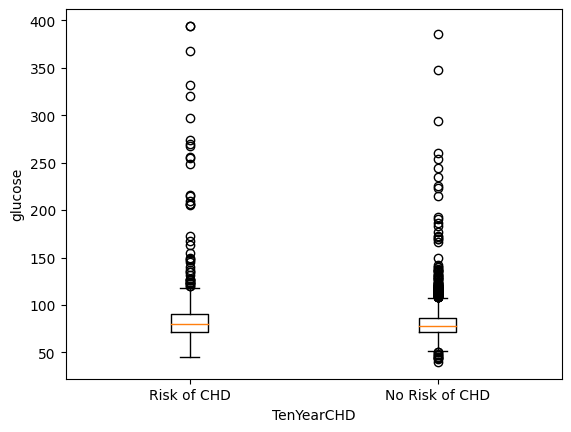

In [26]:
# Chart - 4 visualization code
num_vars = ['age','totChol','sysBP','diaBP','BMI','heartRate','glucose']
target_var = "TenYearCHD"

# Create a box plot for each numerical variable
for num_var in num_vars:
    # Create a box plot of the numerical variable by the target categorical variable
    fig, ax = plt.subplots()
    ax.boxplot([data_visual[data_visual[target_var] == cat][num_var] for cat in data_visual[target_var].unique()])
    ax.set_xticklabels(data_visual[target_var].unique())
    ax.set_xlabel(target_var)
    ax.set_ylabel(num_var)
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

##**Does Educating people of different age groups at different levels lowers the risk of CHD ?**

Text(0.5, 1.0, 'The Risk of CHD based on Age and level of education about the same')

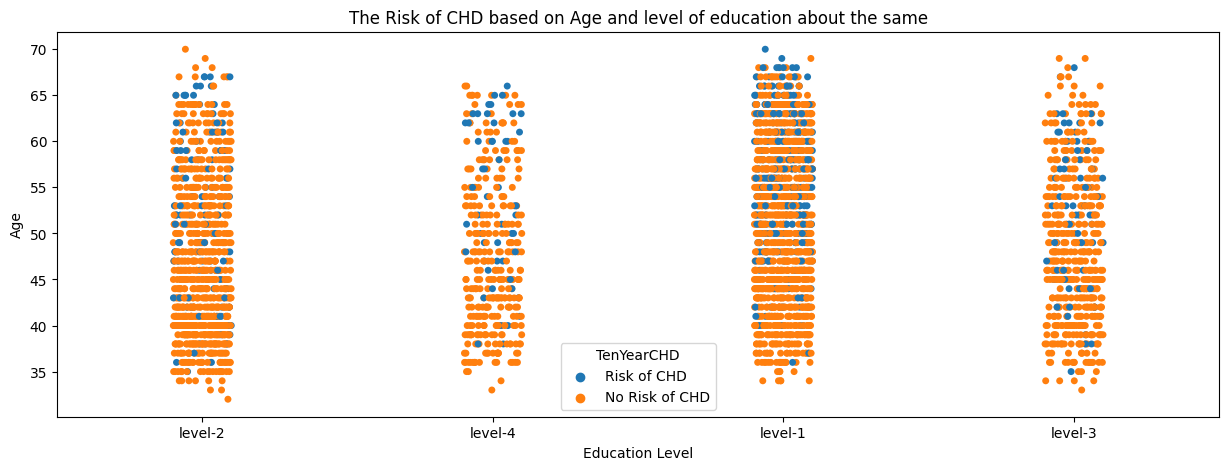

In [27]:
# Chart - 5 visualization code

#The Risk of CHD based on Age and level of education about the same

fig = plt.figure(figsize=(15,5))
sns.stripplot(x='education', y='age',hue='TenYearCHD' ,data=data_visual)
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.title('The Risk of CHD based on Age and level of education about the same')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

##**Who among men and women smokes more and ultimately have higher future risk of CHD ?**

Text(0, 0.5, 'Count of males and females and risk factor')

<Figure size 2000x2000 with 0 Axes>

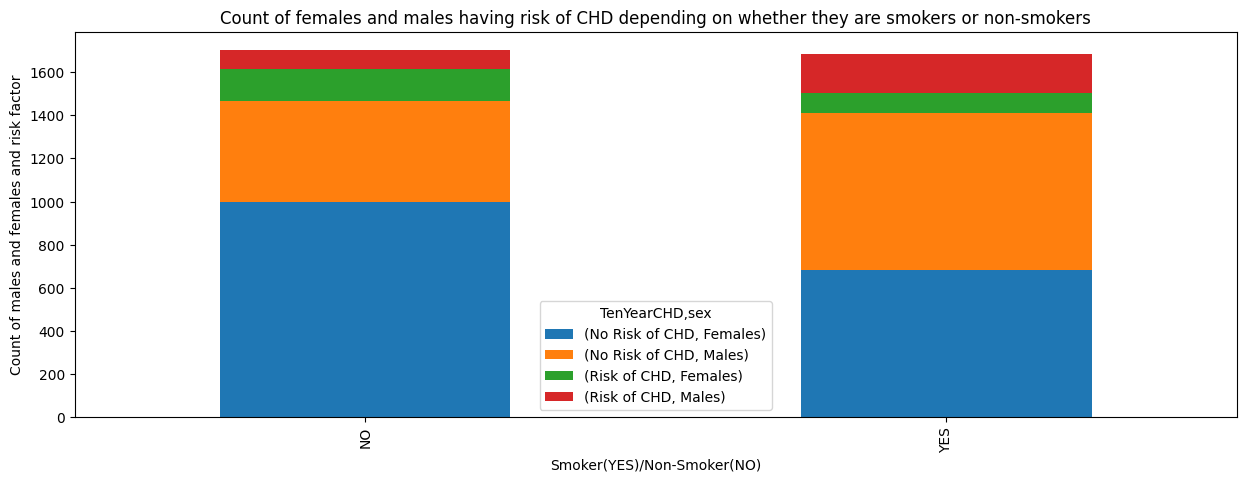

In [28]:
# Chart - 6 visualization code

#Count of females and males having risk of CHD depending on whether they are smokers or non-smokers

cross_tab = pd.crosstab(index=data_visual['is_smoking'],columns= [data_visual['TenYearCHD'],data_visual['sex']])
fig = plt.figure(figsize=(20, 20))
cross_tab.plot(kind='bar', stacked=True,figsize=(15,5))
plt.title('Count of females and males having risk of CHD depending on whether they are smokers or non-smokers')
plt.xlabel('Smoker(YES)/Non-Smoker(NO)')
plt.ylabel('Count of males and females and risk factor')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

##**How many people are actually taking medicine for BP given that the have high BP measures ?**

Text(0.5, 1.0, 'Distribution of people Taking/Not Taking Medicines for BP')

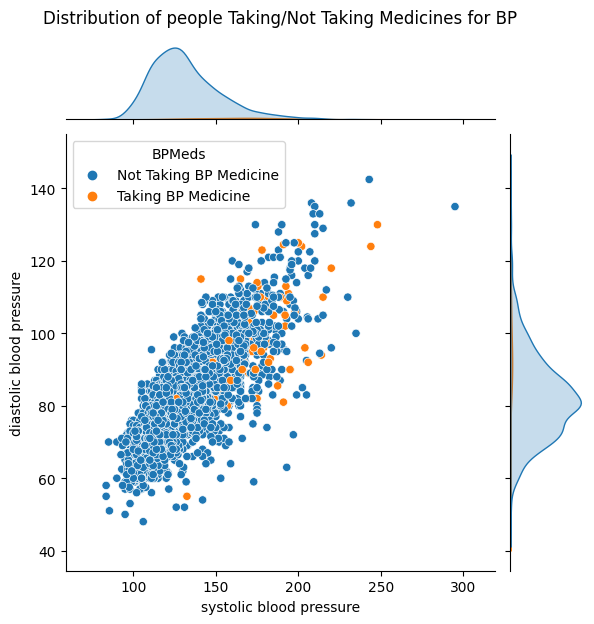

In [29]:
# Chart - 7 visualization code

#Distribution of people Taking/Not Taking Medicines for BP

sns.jointplot(x='sysBP', y='diaBP',hue='BPMeds',data=data_visual)
plt.xlabel('systolic blood pressure')
plt.ylabel('diastolic blood pressure')
plt.title('Distribution of people Taking/Not Taking Medicines for BP',pad=80)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

##**How many cigarette does People having history of hyper tension and stroke ,consume ?**


Text(0.5, 1.0, 'People having history of hyper tension and stroke and number of cigarette consumed by them')

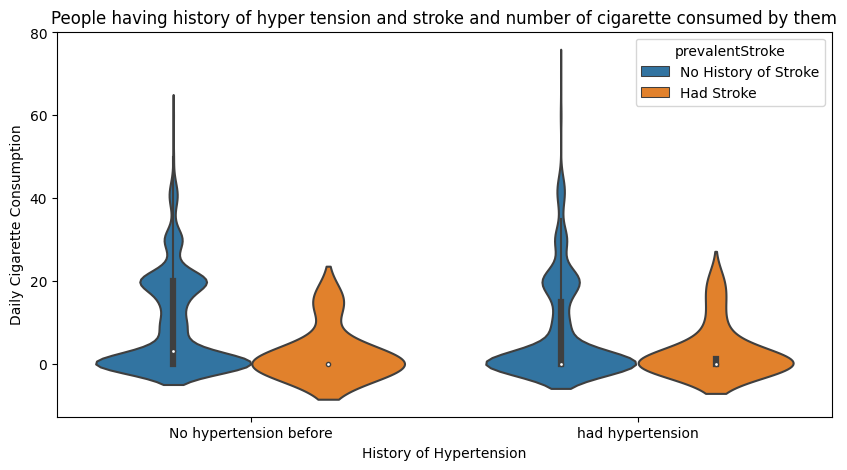

In [30]:
# Chart - 8 visualization code

#People having history of hyper tension and stroke and number of cigarette consumed by them

fig=plt.figure(figsize=(10,5))
sns.violinplot(x='prevalentHyp', y='cigsPerDay', hue='prevalentStroke', data=data_visual)
plt.xlabel('History of Hypertension')
plt.ylabel('Daily Cigarette Consumption')
plt.title('People having history of hyper tension and stroke and number of cigarette consumed by them')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

##**What kind of impact does various medical factors have upon risk of CHD ?**

Text(0, 0.5, 'Values')

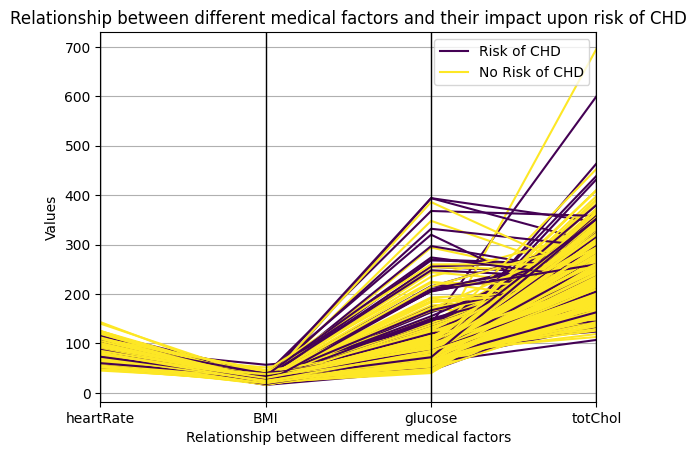

In [31]:
# Chart - 9 visualization code

#Relationship between different medical factors and their impact upon risk of CHD

parallel_coordinates(frame=data_visual[['heartRate','BMI','glucose','totChol','TenYearCHD']], class_column='TenYearCHD', colormap='viridis')
plt.title('Relationship between different medical factors and their impact upon risk of CHD')
plt.xlabel('Relationship between different medical factors')
plt.ylabel('Values')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10


##**How many people have problem of BP and Diabetes together and does it gets severe with age ?**

Text(0, 0.5, 'Age of the person')

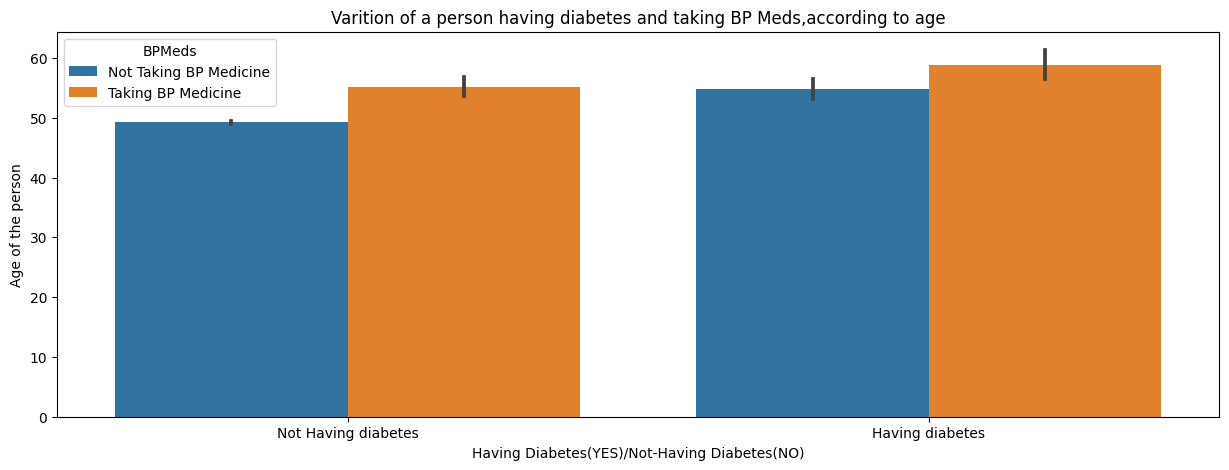

In [32]:
# Chart - 10 visualization code

#Varition of a person having diabetes and taking BP Meds,according to age.

fig=plt.figure(figsize=(15,5))
sns.barplot(data=data_visual, x="diabetes", y="age",hue='BPMeds')
plt.title('Varition of a person having diabetes and taking BP Meds,according to age')
plt.xlabel('Having Diabetes(YES)/Not-Having Diabetes(NO)')
plt.ylabel('Age of the person')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

##**Does risk of CHD is more for people having history of stroke and higher measures of BP ?**

Text(0.5, 1.0, 'The Risk of CHD based on patient BP and whether they have a history of stroke or not')

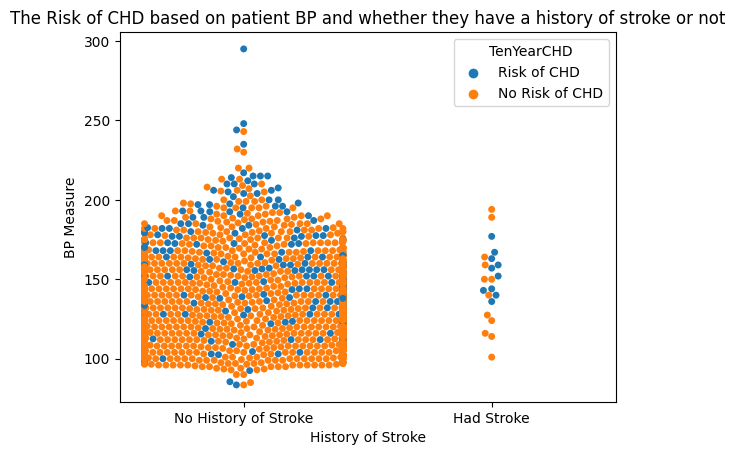

In [33]:
# Chart - 11 visualization code

#The Risk of CHD based on patient BP and whether they have a history of stroke or not

sns.swarmplot(x='prevalentStroke', y='sysBP', data=data_visual,hue='TenYearCHD')
plt.xlabel('History of Stroke')
plt.ylabel('BP Measure')
plt.title('The Risk of CHD based on patient BP and whether they have a history of stroke or not')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

##**What percentage of people (having hypertension history and associated risk of CHD) consume cigarette?**

Text(0, 0.5, 'Average Cigarette Consumption Percentage')

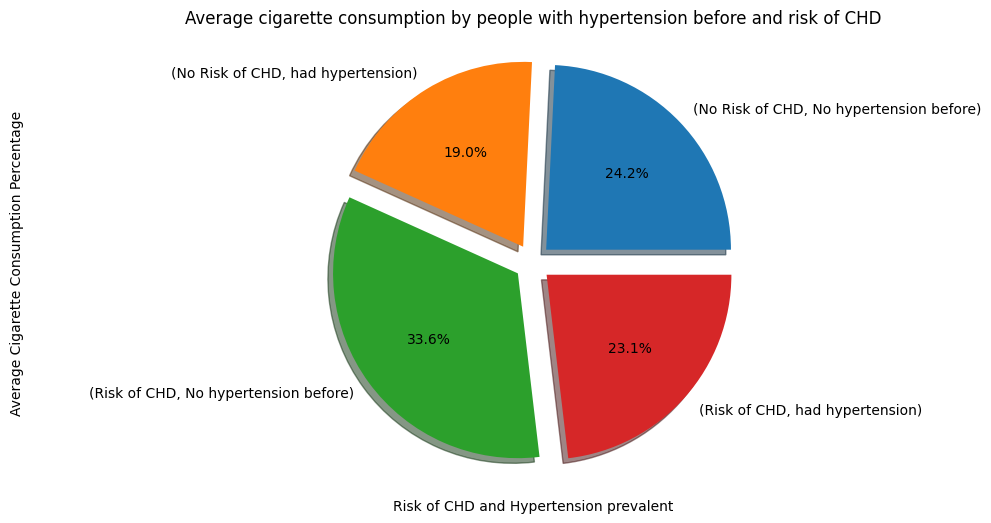

In [34]:
# Chart - 12 visualization code

#Average cigarette consumption by people with hypertension before and associated risk of CHD

data_visual.groupby(['TenYearCHD','prevalentHyp'])['cigsPerDay'].mean().plot(kind='pie',subplots=True,figsize=(6,6),autopct='%1.1f%%',shadow=True,explode=[0.1,0.1,0.1,0.1])
plt.title('Average cigarette consumption by people with hypertension before and risk of CHD')
plt.xlabel('Risk of CHD and Hypertension prevalent')
plt.ylabel('Average Cigarette Consumption Percentage',labelpad=200)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 

##**Among males and females who have higher Risk of future CHD ?**


Text(0, 0.5, 'Count of males and females respectively')

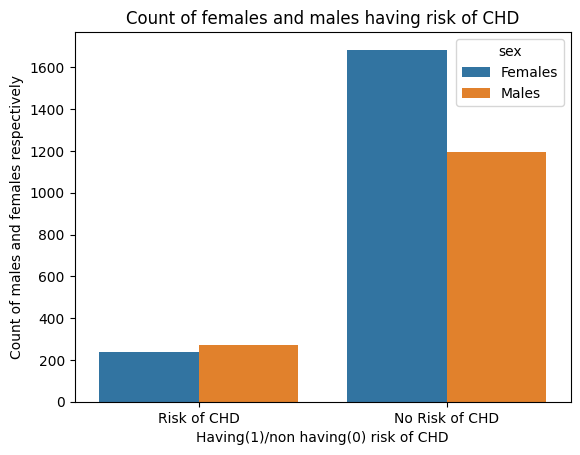

In [35]:
# Chart - 13 visualization code
#10-year Risk of future CHD comparsion among male and female

sns.countplot(x='TenYearCHD',hue='sex', data=data_visual)
plt.title('Count of females and males having risk of CHD')
plt.xlabel('Having(1)/non having(0) risk of CHD')
plt.ylabel('Count of males and females respectively')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

##**Establishing relationship between different variables of data set and checking upon correlation between them ?**

<Axes: >

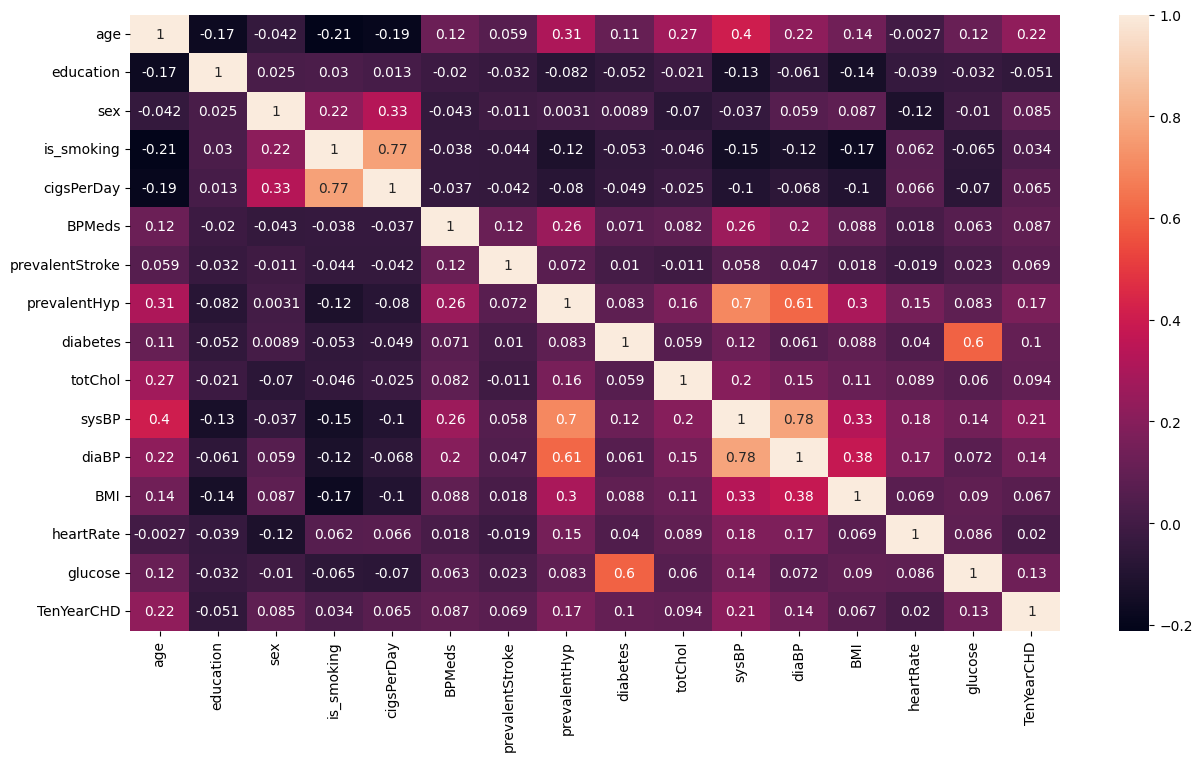

In [36]:
# Correlation Heatmap visualization code
fig=plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

##**At what levels of education people tend to consume more ciggarette and does it affect their BMI and heart rate ?**

<Figure size 1500x1000 with 0 Axes>

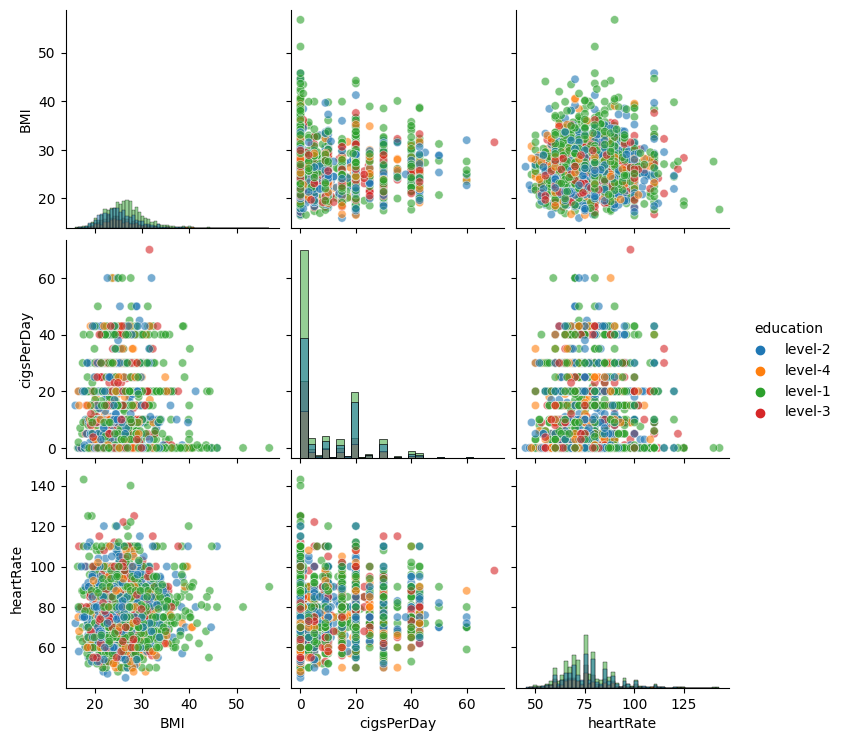

In [37]:
# Pair Plot visualization code

#columns to be used for pair plot
df=data_visual[['BMI','cigsPerDay','heartRate','education']]

#Plotting
fig=plt.figure(figsize=(15,10))
sns.pairplot(df, hue='education', diag_kind='hist', plot_kws={'alpha': 0.6})


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* There is no significant difference in the mean glucose level between the person having higher future risk of CHD and not having the risk of future CHD.

* There is no relationship between age and blood pressure level of a person.

* There is no relationship between a person smoking and having risk of future CHD.


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null_hypothesis :** There is no significant difference in the mean glucose level between the person having higher future risk of CHD and not having the risk of future CHD.


* **Alternative_hypothesis :** There is a significant difference in the mean glucose level between the person having higher future risk of CHD and not having the risk of future CHD.


#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

# Define the null and alternative hypotheses
null_hypothesis='There is no significant difference in the mean glucose level between the person having higher future risk of CHD and not having the risk of future CHD'
alternative_hypothesis=' There is a significant difference in the mean glucose level between the person having higher future risk of CHD and not having the risk of future CHD'

# Perform Statistical Test to obtain P-Value and F- value
g1=data.groupby('TenYearCHD')['glucose'].get_group(0)
g2=data.groupby('TenYearCHD')['glucose'].get_group(1)

F, P = stats.f_oneway(g1,g2)
print(f"F-statistic: {F}")
print(f"p-value: {P}")
if P < 0.05:
   print(f"{alternative_hypothesis}, hence we are rejecting null hypothesis.")
else:
   print(f"{null_hypothesis},hence we fail to reject null hypothesis.")


F-statistic: 61.047504718638876
p-value: 7.376153816681938e-15
 There is a significant difference in the mean glucose level between the person having higher future risk of CHD and not having the risk of future CHD, hence we are rejecting null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **null__hypothesis :** There is no relationship between age and blood pressure level of a person.

* **alternative__hypothesis :** There is a relationship between age and blood pressure level of a person.


#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

# Define the null and alternative hypotheses
null__hypothesis = "There is no relationship between age and blood pressure level of a person"
alternative__hypothesis = "There is a relationship between age and blood pressure level of a person"

# Calculate the correlation between temperature and the number of rented bikes
r, p = stats.pearsonr(data['age'], data['sysBP'])

# Print the result of the test
print(f"Correlation coefficient: {r}")
print(f"p-value: {p}")
if p < 0.05:
   print(f"{alternative__hypothesis}, hence we are rejecting null hypothesis.")
else:
   print(f"{null__hypothesis},hence we fail to reject null hypothesis.")

Correlation coefficient: 0.4048449447742168
p-value: 6.838000925613275e-134
There is a relationship between age and blood pressure level of a person, hence we are rejecting null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**null__hypothesis :** There is no relationship between a person smoking and having risk of future CHD.

**alternative__hypothesis :** There is a relationship between a person smoking and having risk of future CHD.


#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

# Define the null and alternative hypotheses
null__hypothesis = "There is no relationship between a person smoking and having risk of future CHD"
alternative__hypothesis = "There is a relationship between a person smoking and having risk of future CHD"


# Create a contingency table from the two categorical variables
contingency_table = pd.crosstab(data['is_smoking'], data['TenYearCHD'])

# Perform the chi-square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic:', stat)
print('Degrees of freedom:', dof)
print('P-value:', p)
print('Expected frequencies:', expected)
if p < 0.05:
   print(f"{alternative__hypothesis}, hence we are rejecting null hypothesis.")
else:
   print(f"{null__hypothesis},hence we fail to reject null hypothesis.")

Chi-square statistic: 3.763250993795598
Degrees of freedom: 1
P-value: 0.05239062274853224
Expected frequencies: [[1446.29410029  256.70589971]
 [1432.70589971  254.29410029]]
There is no relationship between a person smoking and having risk of future CHD,hence we fail to reject null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [41]:
# Handling Missing Values & Missing Value Imputation

#Since we have a lot of missing values in our data set , we'll first perform missing value imputation.

#Segregating columns into categorical and numerical having null values.
cat=['education','BPMeds']
num=['glucose','totChol','cigsPerDay','BMI','heartRate']


In [42]:
#Using Simple imputer for categorical values.

#initialising object
simp_imputer = SimpleImputer(strategy="most_frequent")
#fitting required data
simp_imputer.fit(data[cat])
#tranformed and and added back data
data[cat]= simp_imputer.transform(data[cat])

In [43]:
#Using Knn imputer for categorical values.

#initialising object
knn_imputer= KNNImputer(n_neighbors=5)
#fitting required data
knn_imputer.fit(data[num])
#tranformed and and added back data
data[num]= knn_imputer.transform(data[num])

In [44]:
#Checking missing values and finding it to be sorted.
data.isna().sum().sort_values(ascending=False)

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

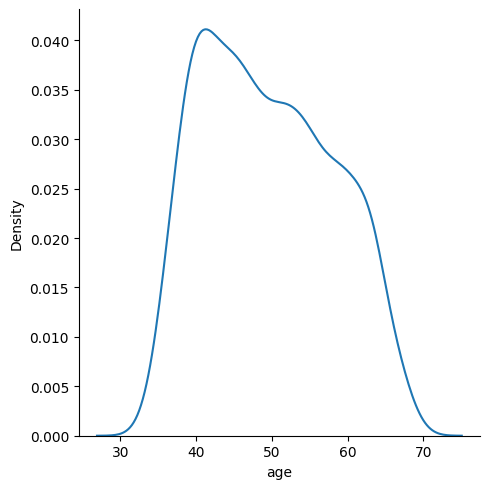

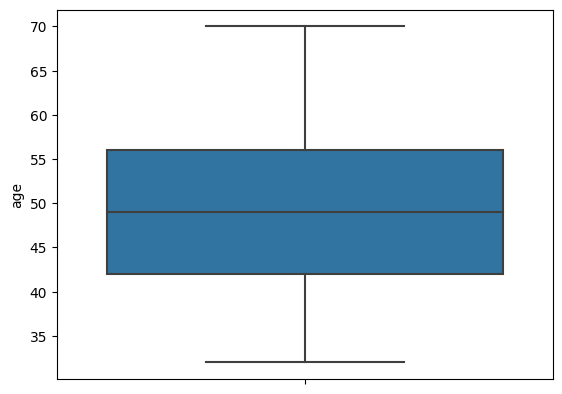

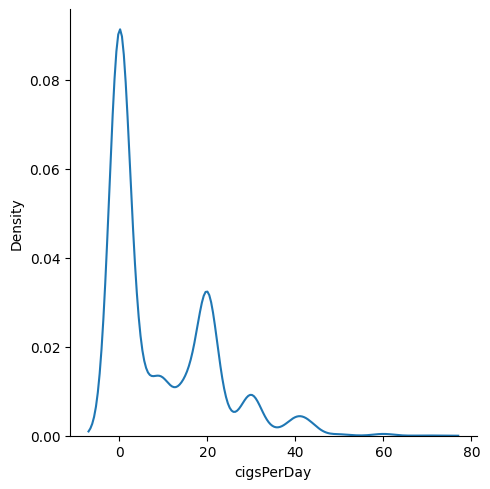

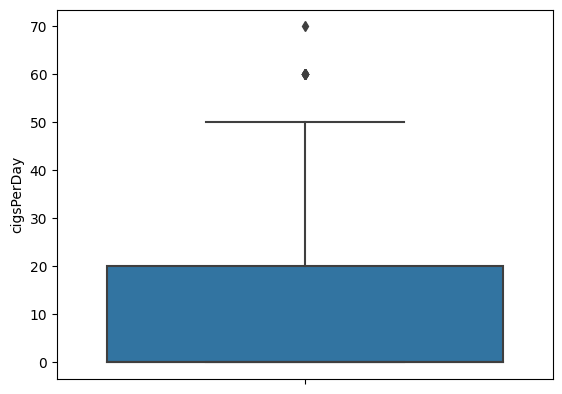

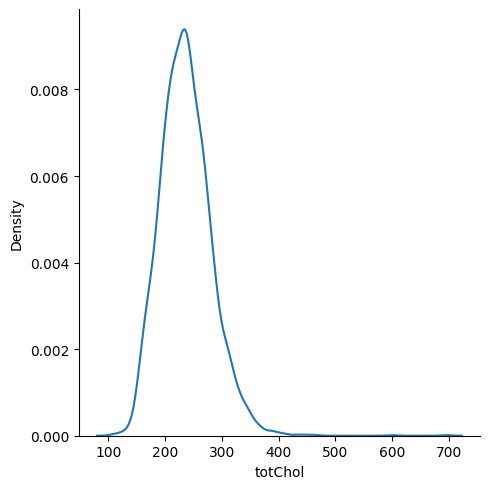

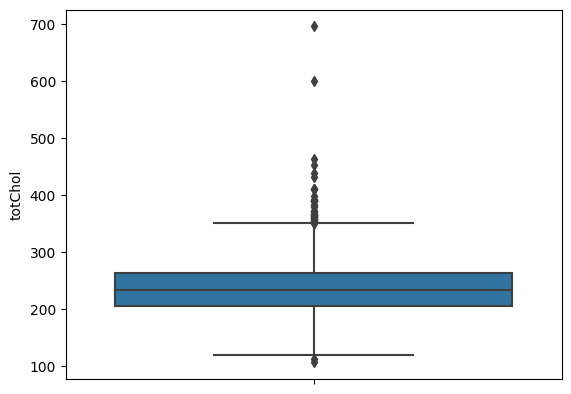

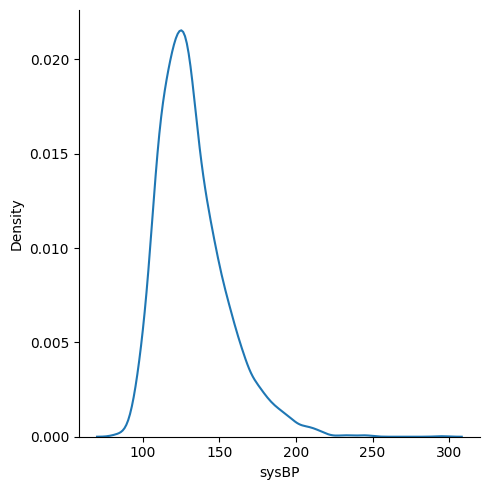

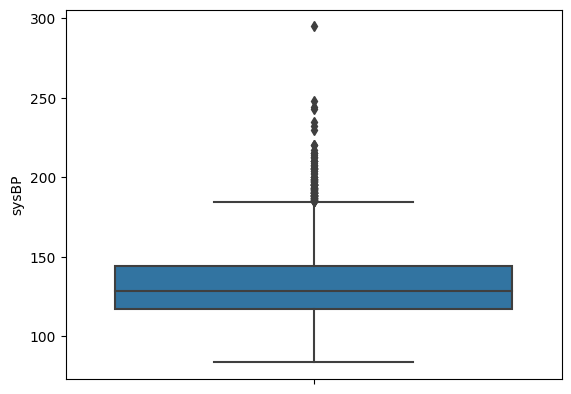

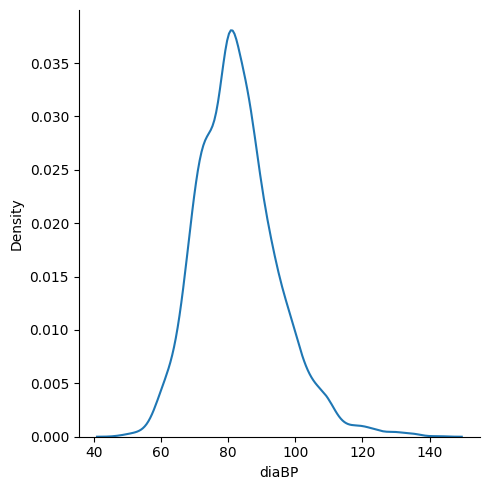

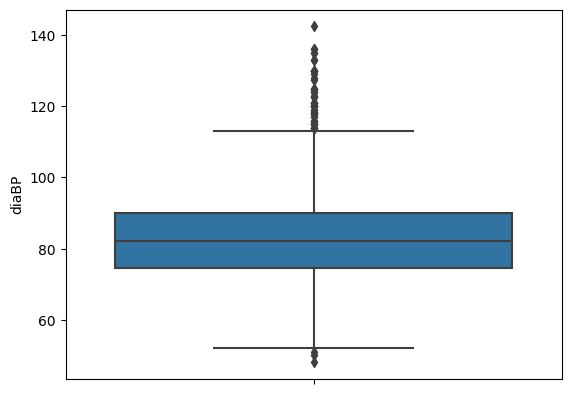

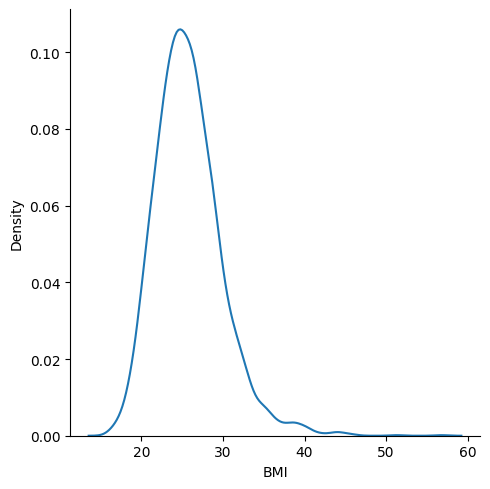

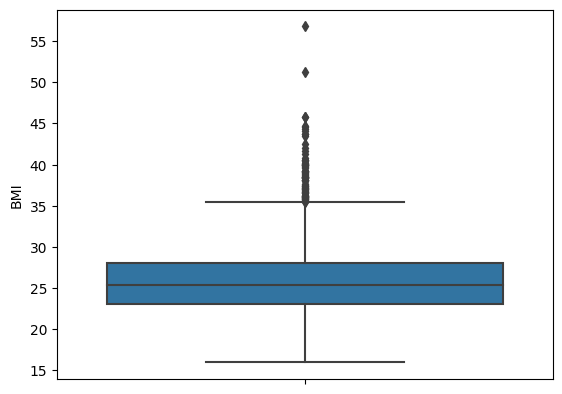

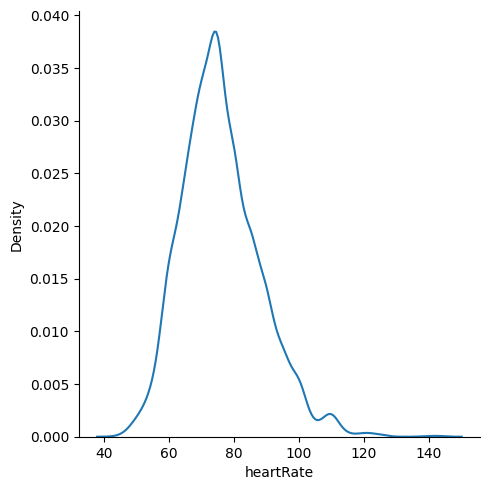

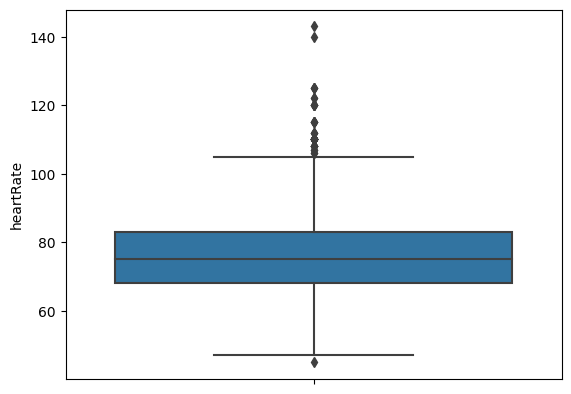

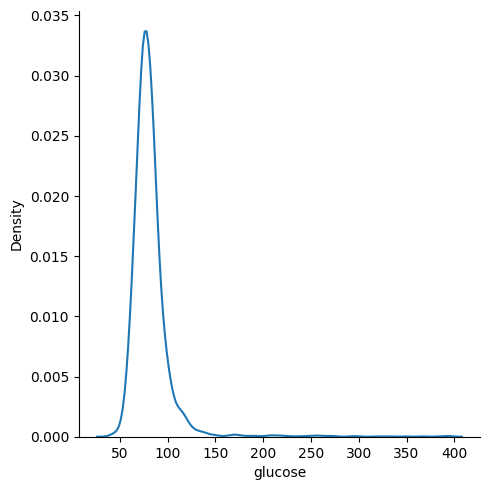

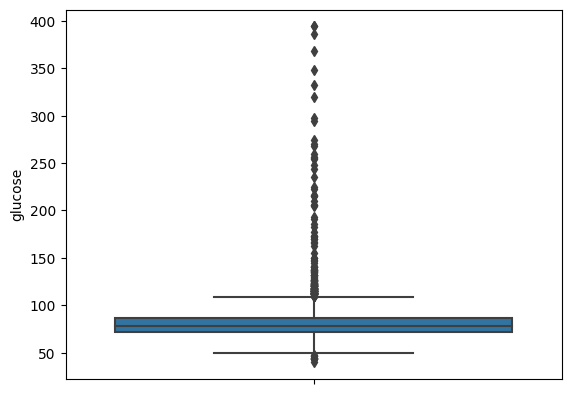

In [45]:
# Handling Outliers & Outlier treatments
#Distribution and outlier analysis
for v in data_visual.select_dtypes(exclude=['object']):

   sns.displot(data=data, x=v, kind="kde")#displot for distribution analysis
   plt.show()

   sns.boxplot(data=data,y=v)#boxplot for outlier analysis
   plt.show()

In [75]:
#Implementing IQR method 
for v in ['totChol', 'cigsPerDay', 'sysBP', 'diaBP', 'BMI', 'heartRate']:
   vals = data[v].quantile([0.25,0.75])
   iqr = vals.values[1] - vals.values[0]
   min_lim, max_lim = vals.values[0] - 1.5*iqr, vals.values[1] + 1.5*iqr
   #Assigning those outliers with min and max values
   data[v] = data[v].apply(lambda x : min_lim if x < min_lim else x)
   data[v] = data[v].apply(lambda x : max_lim if x > max_lim else x)

In [76]:
vals = data['glucose'].quantile([0.25,0.75])
iqr = vals.values[1] - vals.values[0]
min_lim, max_lim = vals.values[0] - 1.5*iqr, 145

#Assigning those outliers with min and max values
data['glucose'] = data['glucose'].apply(lambda x : min_lim if x < min_lim else x)
data['glucose'] = data['glucose'].apply(lambda x : max_lim if x > max_lim else x)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [77]:
# Encode your categorical columns
data['sex']=np.where(data['sex']=='M',1,0)
data['is_smoking']=np.where(data['is_smoking']=='YES',1,0)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [47]:
# Expand Contraction

#### 2. Lower Casing

In [48]:
# Lower Casing

#### 3. Removing Punctuations

In [49]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [50]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [51]:
# Remove Stopwords

In [52]:
# Remove White spaces

#### 6. Rephrase Text

In [53]:
# Rephrase Text

#### 7. Tokenization

In [54]:
# Tokenization

#### 8. Text Normalization

In [55]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [56]:
# POS Taging

#### 10. Text Vectorization

In [57]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

<Axes: >

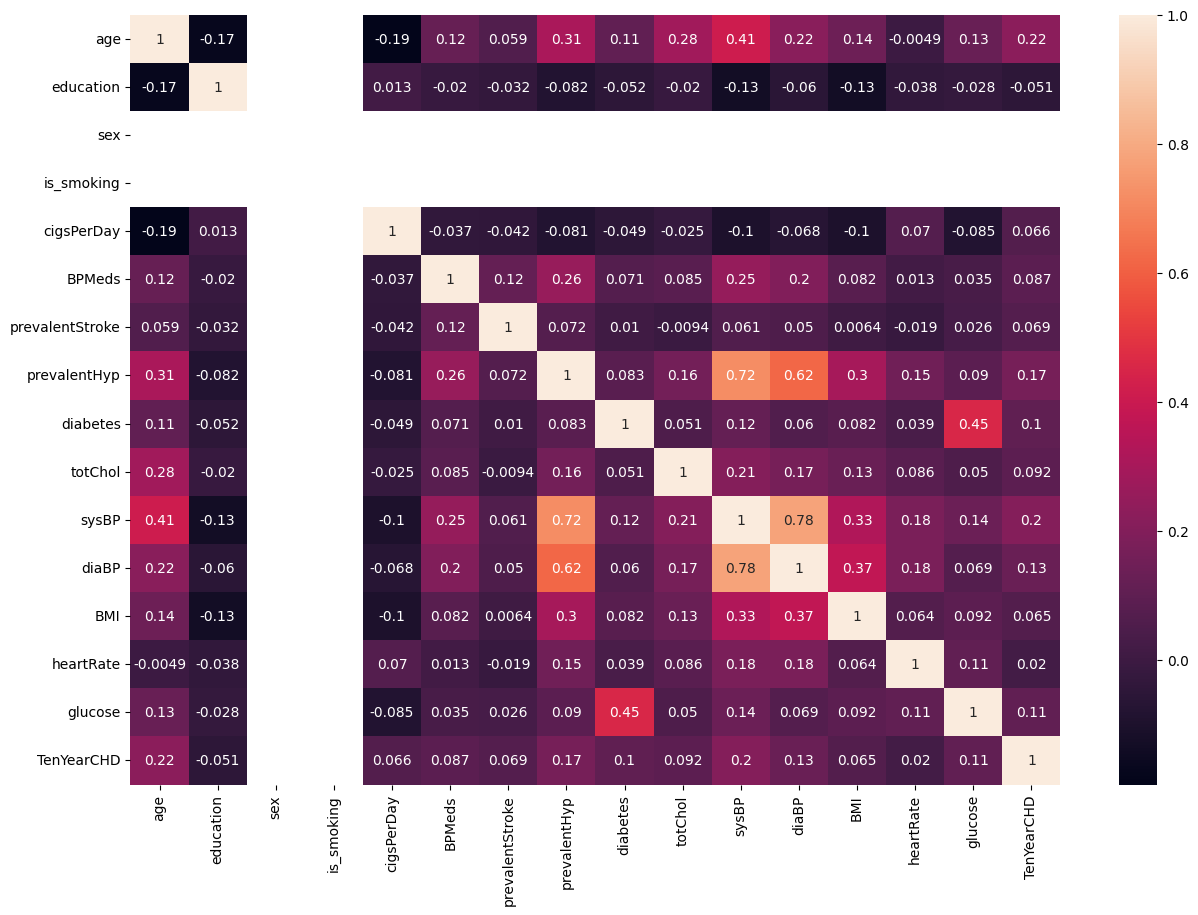

In [99]:
# Manipulate Features to minimize feature correlation and create new features
#creating heatmap for analysis
fig=plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [100]:
data['PP']=abs(data['sysBP']-data['diaBP'])#Introducing 'PP' feature in the dataset
data=data.drop(columns=['is_smoking','diaBP','sysBP','prevalentHyp'])#removing other irrelevant highly correlated features 

<Axes: >

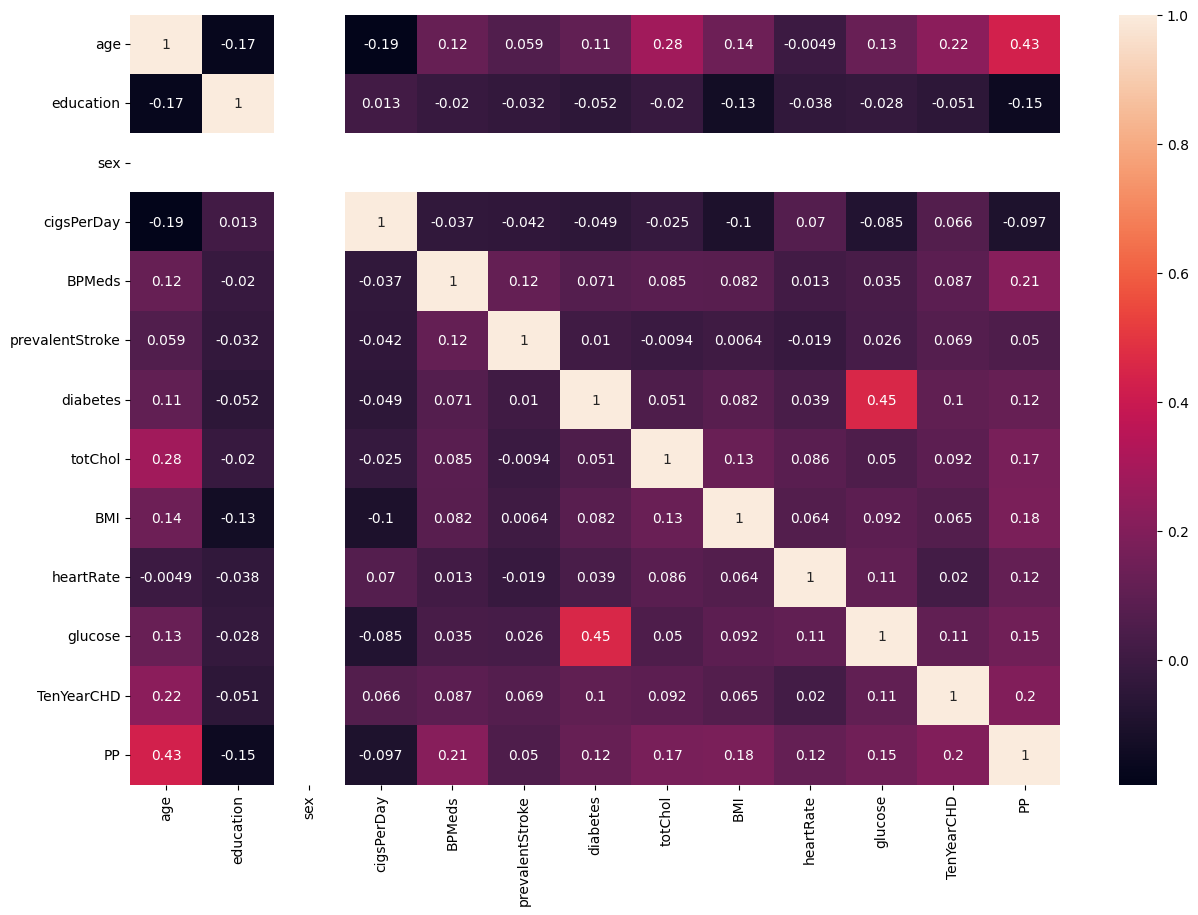

In [101]:
#Rechecking correlation after necessary changes

fig=plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [102]:
#storing target variable seperately in Y and independent variables in X.
X = data.drop(columns=['TenYearCHD'], axis=1)
Y = data['TenYearCHD']

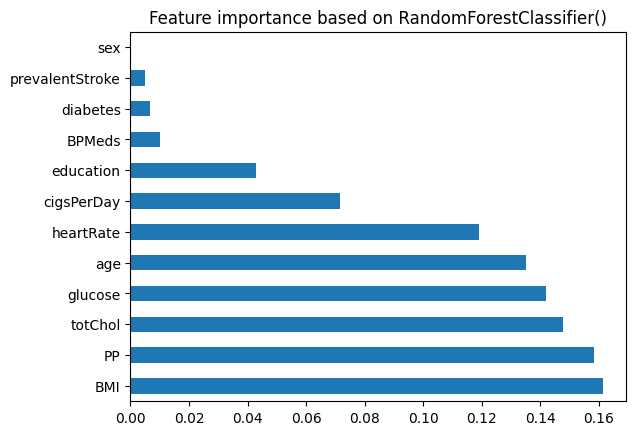

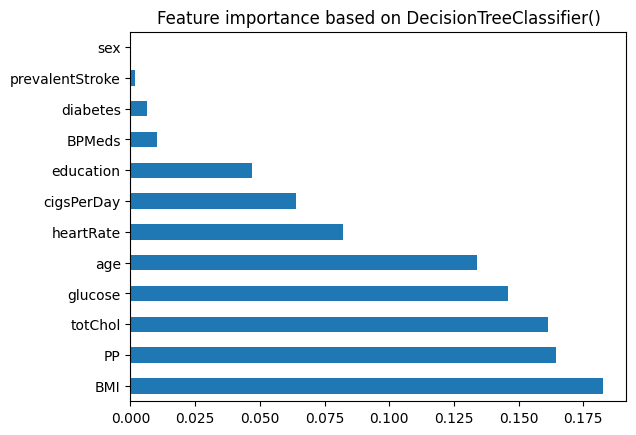

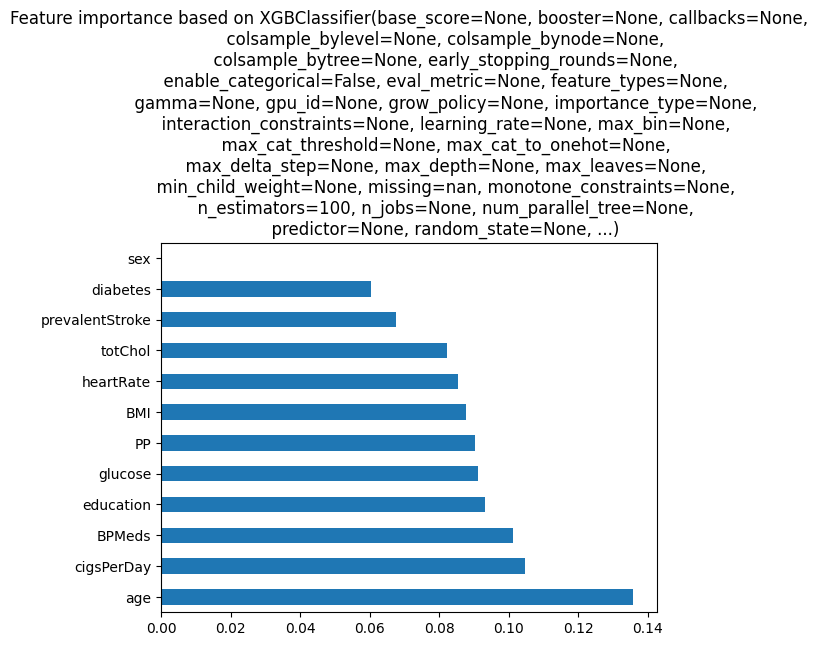

In [103]:
#Analysing feature importance based RandomForestClassifier,DecisionTreeClassifier and XGBClassifier
for v in [RandomForestClassifier(),DecisionTreeClassifier(),XGBClassifier()]:
    v.fit(X,Y)
    ranked_features=pd.Series(v.feature_importances_,index=X.columns)
    ranked_features.nlargest(15).plot(kind='barh')#barplot based on feature importance
    plt.title(f'Feature importance based on {v}')
    plt.show()

#### 2. Feature Selection

In [104]:
# Select your features wisely to avoid overfitting
X=X.drop(columns=['prevalentStroke','diabetes','BPMeds','BMI'])#Droping features from x variables for further model implementation.

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [60]:
# Transform Your data

### 6. Data Scaling

In [61]:
# Scaling your data



##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [62]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [63]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [64]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [65]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [68]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [70]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [73]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [74]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***